# S&P Notebook

## Introduction
  * Purpose
    * Develop real-world application of machine prediction to S&P 500 up and down trends. Investmentors are keenly interested in monitoring and anticipating market ups and downs in order to gain faincial benefit. Additionally they are keenly interested in when the market will turn down form "Bull" to "Bear" in order to properly allocate their investments. This analyisis illustrantes how to successfully apply machine learning in order to provide investors with a "signal" market up or down in order to guide their investments.
    * Explore methods including heuristics and prediction
    * Contribute open-source code
  * Trade strategy
    * Predict up/down, buy/hold or sell/sit
  * Results Summary, what we learned
    * We learn basic machine prediction supplemented with heuristics, based on historic S&P 500 data, provides improved financial return vs. S&P 500. Based on the data analysis, we gain many insights about the market, which of course are consistent with basic market theory.
    * There are many improvements that can be made to Feauture selection, class labels based on trading strategy, however that goes beyond the scope of this exercise. 
  * Overview
    * Python Jupyter notebook
    * Algosciquant (library of Python functions) contributed in Github
    * Market cycles (Bull and Bear)
    * Scikit Decision Tree and Random forest prediction models
    * Demonstrate how to apply these models (train) and employ them to predict outcomes
    * Heuristics (volatility, market cycles)
    * Backtest
    * Summarize results with graphs and back testing
  

# Setup

dataStartDate = 2014-01-01 00:00:00
test_st = 2016-01-01 00:00:00
test_et = 2017-06-14 00:00:00


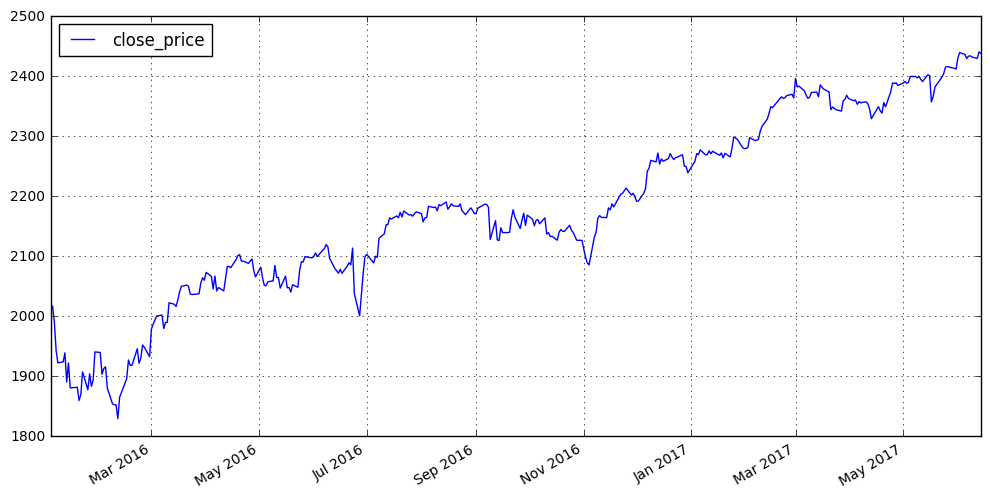

In [154]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
%run algosciquant

# Paramters
ticker = "^GSPC"
test_st = dt.datetime(2016,1,1)  # 2016 for everyday updates
dataStartDate=dt.datetime(2014,1,1) # 2015 for everyday updates
train_st = dataStartDate
today = dt.datetime.today()
test_et = dt.datetime(today.year,today.month,today.day)
#test_et = dt.datetime(2017,4,28)

print('dataStartDate =',dataStartDate)
print('test_st =',test_st)
print('test_et =',test_et)

#Read in Data
dfsp = pd.read_csv('./stock_data/sp500.csv',index_col=0,parse_dates=True)
dfsp = dfsp[dataStartDate:]

rcParams['figure.figsize'] = 12, 6
dfsp.loc[test_st:test_et,['close_price']].plot(grid=True)


# Market Cycles


mcdown = 20
mcup = 25
 ...
               endPrice    endTime      mcnr  mkt  \
2014-01-02  2437.919922 2017-06-14  0.330757  1.0   

                                                   startPrice  startTime  
2014-01-02  close_price    1831.979980
mkt               1... 2014-01-02  
filename = sp500_dfmc2025_2014_2017-6-14.csv
dataStartDate =  2014-01-01 00:00:00
test_st =  2016-01-01 00:00:00 , test_et = 2017-06-14 00:00:00


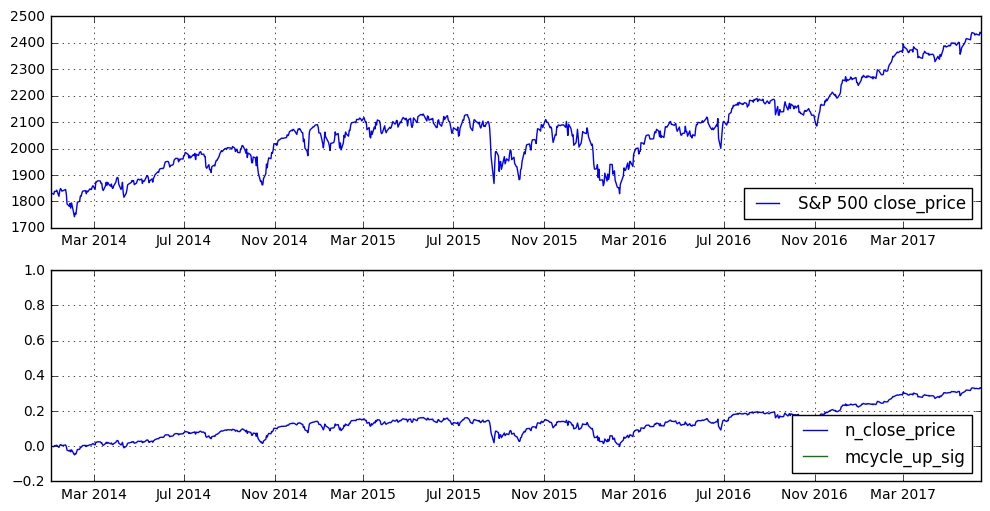

In [155]:

# Market Cycles

%run algosciquant2
compute=1
if compute==1:
    initMarket=1 # market cycle ... ... #  1, 20% .. 1%, 1950
    mcdown_p=20
    mcup_p=25
    mcvariable=str(mcdown_p)+str(mcup_p)
    mcdp=mcdown_p/100
    mcup=mcup_p/100
    #last_sp_date=dfsp.index[len(dfsp.index)-1]
    #print(last_sp)
    print('\nmcdown =',mcdown_p)
    print('mcup =',mcup_p)
    mudLogic=mudLogic1
    print(" ...")
    (dfmc, dfmcsummary)=marketCycle(dfsp.loc[dataStartDate:test_et],initMarket,'close_price',mcdp,mcup,mudLogic)
    print(dfmcsummary.tail(10))
    
    # save market cycle
    save_dfmc_filename='sp500_dfmc'+str(mcdown_p)+str(mcup_p)+'_'+str(dataStartDate.year)+'_'+str(test_et.year)+'-'+str(test_et.month)+'-'+str(test_et.day)+'.csv'
    print('filename =',save_dfmc_filename)
    dfmc.to_csv(save_dfmc_filename)


# Load Market Cycle files
read=0
if read ==1:
    mcvariable='2025'
    mc_filename='./data_jupyter_notebook/sp500_dfmc'+mcvariable+'_1950_2017-4-28.csv'
    dfmc = pd.read_csv(mc_filename,index_col=0,parse_dates=True)
    
# Plot S&P 500 Market Cycle
rcParams['figure.figsize'] = 12, 6
print("dataStartDate = ",dataStartDate)
print('test_st = ',test_st,', test_et =', test_et)
s=dataStartDate
e=test_et
plt.subplot(211)
plt.plot(dfsp.loc[s:e,['close_price']],label='S&P 500 close_price')
plt.legend(loc='lower right');plt.grid(True)
plt.subplot(212)
plt.plot(dfmc.loc[s:e,['mcnr']],label='n_close_price')
plt.plot(dfmc.loc[s:e,['mcupm']],label='mcycle_up_sig')
plt.legend(loc='lower right');plt.grid(True)

# Machine Learning Features and Truth Labels

Truth t_n
            close_price  t_n
2017-06-08  2433.790039   -1
2017-06-09  2431.770020   -1
2017-06-12  2429.389893   -1
2017-06-13  2440.350098   -1
2017-06-14  2437.919922   -1

ML features
Index(['close_pricer', 'volumer', 'close_price', 'sp_volume',
       'high_price_ropen', 'low_price_ropen', 'close_pricer_h1',
       'close_pricer_h2', 'close_pricer_ma5', 'close_pricer_ma10',
       'close_pricer_ma20', 'close_pricer_ma30', 'close_pricer_ma60',
       'close_pricer_ma90', 'close_pricer_ma120', 'volumer_h1', 'volumer_h2',
       'volumer_ma5', 'volumer_ma10', 'volumer_ma20', 'volumer_ma30',
       'volumer_ma60', 'volumer_ma90', 'volumer_ma120', 'vol_y_10', 'vol_y_50',
       'vol_y_120', 'mc2025', 'mcupm', 'mcnr', 'mucdown', 'mdcup'],
      dtype='object')
data start date = 2014-01-01 00:00:00 , start date = 2016-01-01 00:00:00 , end date = 2017-06-14 00:00:00
nrows =  756 null_rows =  120


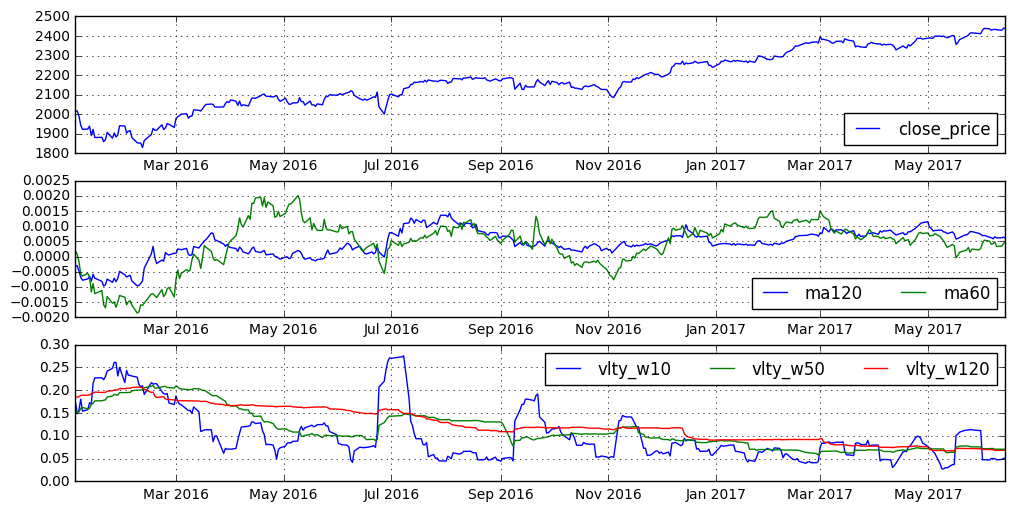

In [156]:
# ML Features and Truth
%run algosciquant

# Truth Variable
nday=43
dfT= ndayTruth(dfsp.loc[dataStartDate:test_et, ['close_price']], nday,tvariable='close_price')
print('Truth t_n')
print(dfT.tail(5))

# ML Features
dfML=mlSpFeatures(dfsp,dfmc,mcvariable,dataStartDate,test_et)

print("\nML features")
print(dfML.columns)

s=test_st
e=test_et
#s=dt.datetime(1987,1,1)
#e=dt.datetime(1988,3,1)

print('data start date =',dataStartDate, ', start date =',test_st,', end date =',test_et)   
# plot close_price
plt.subplot(311)
plt.plot(dfML.loc[s:e,['close_price']],label='close_price')
plt.grid(True); plt.legend(loc = 'lower right')

#  plot moving average
plt.subplot(312);  
plt.plot(dfML.loc[s:e,['close_pricer_ma120']],label='ma120')
plt.plot(dfML.loc[s:e,['close_pricer_ma60']],label='ma60')
plt.grid(True); plt.legend(loc = 'lower right', ncol= 2)
plt.subplot(313)
#  plot volatility    
plt.plot(dfML.loc[s:e,['vol_y_10']],label='vlty_w10')
plt.plot(dfML.loc[s:e,['vol_y_50']],label='vlty_w50')
plt.plot(dfML.loc[s:e,['vol_y_120']],label='vlty_w120')
plt.grid(True)
plt.legend(loc = 'upper right',ncol=3)

# Null Rows
s=dt.datetime(1952,6,1)
e=dt.datetime(2017,1,1)
nullrows=sum([True for idx,row in dfML.loc[s:e].iterrows() if any(row.isnull())])
nrows=len(dfML.loc[s:e])
print("nrows = ",nrows,"null_rows = ",nullrows)


# Training and Prediction

In [160]:
#  Training and Prediction
#   for each test date a classifier will be trained until test date - 1

%run algosciquant2

model='DT'
# Create training data frames ... separate into X and Y

X = dfML.loc[train_st:test_et,dfML.columns]
Y = dfT.loc[train_st:test_et]

##### Run the classifier 
print("...")
dfTR,clf = mClfTrainTest(X,Y,nday,train_st,test_st,test_et,model,v=1)



# Volatility and MovingAverage Signal   
mc_mcvariable='mc'+mcvariable
vltyw='120'; maw='60'
dfTR=volatilityPriceSP(dfTR,vltyw,maw,mcvariable=mc_mcvariable)
print("vltyw =",vltyw,", maw =",maw)
print('\n',dfTR.columns)


# Save
tick='sp'
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
str_test_styr=str(test_st.year)
save_dtr_filename='dfclfm_'+tick+'_nd'+str(nday)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
print('output filename =',save_dtr_filename)
dfTR.to_csv(save_dtr_filename)

# Print training results
print('model =',model)
print('test start date:',test_st)
print('test end date:',test_et)
print('\n')
print(dfTR[['close_price','vol_y_'+vltyw,'mucdown','mdcup','close_pricer_ma'+maw]].tail(5))
print('\n')
print(dfTR[['t_n','p_n','p','p_1','v',mc_mcvariable,mc_mcvariable+'p',mc_mcvariable+'v',mc_mcvariable+'pv']].tail(5))


# Plot Train Summary

plot_train_summary=0
if plot_train_summary==1:
    dftrainsummary = pd.read_csv('./data_jupyter_notebook/df_sp_trainsummary.csv',index_col=0,parse_dates=True)
    dftrainsummary[['S&P_rf_accuracy','S&P_dt_accuracy']].plot(use_index=True,grid=True)
    plt.xlim(1,120)
    plt.ylim(0.3,1)

# Confusion Matrix "p"

(samplesize, errors, correct, er, fn, fp, tp, tn, fnr, fpr, tpr, tnr, dfCMdef, dfCMA, dfCMR)=clfMktConfusionMatrix(dfTR,"t",'p')

print('\nerror_rate =',er)
dfCMR[['Totals','Predicted MktDown','Predicted MktUp']]


...
2016-01-04
2017-01-03

vltyw = 120 , maw = 60

 Index(['close_pricer', 'volumer', 'close_price', 'sp_volume',
       'high_price_ropen', 'low_price_ropen', 'close_pricer_h1',
       'close_pricer_h2', 'close_pricer_ma5', 'close_pricer_ma10',
       'close_pricer_ma20', 'close_pricer_ma30', 'close_pricer_ma60',
       'close_pricer_ma90', 'close_pricer_ma120', 'volumer_h1', 'volumer_h2',
       'volumer_ma5', 'volumer_ma10', 'volumer_ma20', 'volumer_ma30',
       'volumer_ma60', 'volumer_ma90', 'volumer_ma120', 'vol_y_10', 'vol_y_50',
       'vol_y_120', 'mc2025', 'mcupm', 'mcnr', 'mucdown', 'mdcup', 't_n', 'tf',
       'p_n', 'train_st', 'train_et', 't', 'p', 'p_1', 'mc2025v_1',
       'mc2025pv_1', 'mc2025p_1', 'pv_1', 'v_1', 'pv', 'v', 'mc2025v',
       'mc2025pv', 'mc2025p'],
      dtype='object')
output filename = dfclfm_sp_nd43_2016_2017614_DT.csv
model = DT
test start date: 2016-01-01 00:00:00
test end date: 2017-06-14 00:00:00


            close_price  vol_y_120   mucdown  

,Totals,Predicted MktDown,Predicted MktUp
actual MktDown,60,0.666667,0.316667
actual MktUp,262,0.274809,0.725191


# Back Test

In [153]:
# BackTest
%run algosciquant2

# Strategy Trade
readfile=0
pvariable='mc2025pv' # p, v, pv, mc2025, mc2025v, mc2025pv
bt_summary_graphs=0

# Read File
price_variable='close_price'
if readfile==1:
    bt_model='RF' # RF or DT
    bt_startyear='2000' # 1952 DT, 1970 DT and RF, 1980 DT and RF, 1990 DT and RF, 2000 DT and RF
    bt_test_st=dt.datetime(int(bt_startyear),1,1)
    bt_test_et=dt.datetime(2017,4,28)
    str_test_et=str(bt_test_et.year)+str(bt_test_et.month)+str(bt_test_et.day)
    dfTR_fn='./data_jupyter_notebook/dfclfm_sp_nd43_'+bt_startyear+'_'+str_test_et+'_'+bt_model+'.csv'
    dfTR2 = pd.read_csv(dfTR_fn,index_col=0,parse_dates=True)
    bt_nday=43;bt_vltyw=120; bt_maw=60;
else:
    bt_test_st=test_st
    bt_test_et=test_et
    bt_model=model;bt_nday=nday; bt_vltyw=vltyw; bt_maw=maw; bt_startyear=str(test_st.year)
    dfTR2=dfTR

print('...')
# Backtest
ticker='sp'
dft=tradeReturns(dfTR2,price_variable)
dft=strategyTrade(dft,price_variable,price_variable+'_R',pvariable)
(dftsummary,dfreturns)=backTestSummary(dft,price_variable,bt_test_st,bt_test_et)

# Save File

ticker='sp'
str_test_styr=str(test_st.year)
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
save_dft_filename='dft_'+ticker+'_nd'+str(bt_nday)+'_'+str(pvariable)+'_'+bt_startyear+'_'+str_test_et+'_'+bt_model+'.csv'
dft.to_csv(save_dft_filename)


# Plot Results
s=bt_test_st
e=bt_test_et

# Print Results
print('\nstrategy trade variable = ',pvariable)
print('start year,',bt_startyear,'end date,',test_et)    
print('model = ',bt_model,', nday = ',bt_nday,', ma = ',bt_maw,', vltyw = ',bt_vltyw)
print('dft filename =',save_dft_filename)

# Plot
bt_summary_graphs=0
if bt_summary_graphs==1:
    files=[
     './data_jupyter_notebook/dft_sp_nd43_p_'+bt_startyear+'_2017428_DT.csv',
     './data_jupyter_notebook/dft_sp_nd43_mc2025pv_'+bt_startyear+'_2017428_RF.csv',
     './data_jupyter_notebook/dft_sp_nd43_mc2025_'+bt_startyear+'_2017428_DT.csv',
     './data_jupyter_notebook/dft_sp_nd43_pv_'+bt_startyear+'_2017428_RF.csv',
     './data_jupyter_notebook/dft_sp_nd43_p_'+bt_startyear+'_2017428_RF.csv',  
     './data_jupyter_notebook/dft_sp_nd43_p_'+bt_startyear+'_2017428_DT.csv'
    ]

    lnames=['close_price','mc2025pv_rf','mc2025','pv_rf','p_rf','p_dt']
    price_variable='close_price'
    fig = plt.figure()
    s=bt_startyear
    e=bt_test_et
    dftnf_plot(fig,s,e,files,price_variable,lnames,nsubplot=111,ncol=1) 

# print

print("\nAnnualized Returns")
print(dfreturns)

bt_summary_print=1
if bt_summary_print==1:
    print('\nYearly Trade Summary')
    print(dftsummary[['end_close_price','end_close_price_SP','return','return_SP']])


...

strategy trade variable =  mc2025pv
start year, 2016 end date, 2017-06-14 00:00:00
model =  DT , nday =  43 , ma =  60 , vltyw =  120
dft filename = dft_sp_nd43_mc2025pv_2016_2017614_DT.csv

Annualized Returns
                  Ra  Ra_strat        Rc  Rc_strat     nyear
2017-06-14  0.140986  0.144321  0.211084  0.216227  1.452055

Yearly Trade Summary
      end_close_price  end_close_price_SP    return  return_SP
2016      2257.830078         2267.418512  0.121814   0.126578
2017      2437.500000         2447.851446  0.079576   0.079576


# Summary Graphs

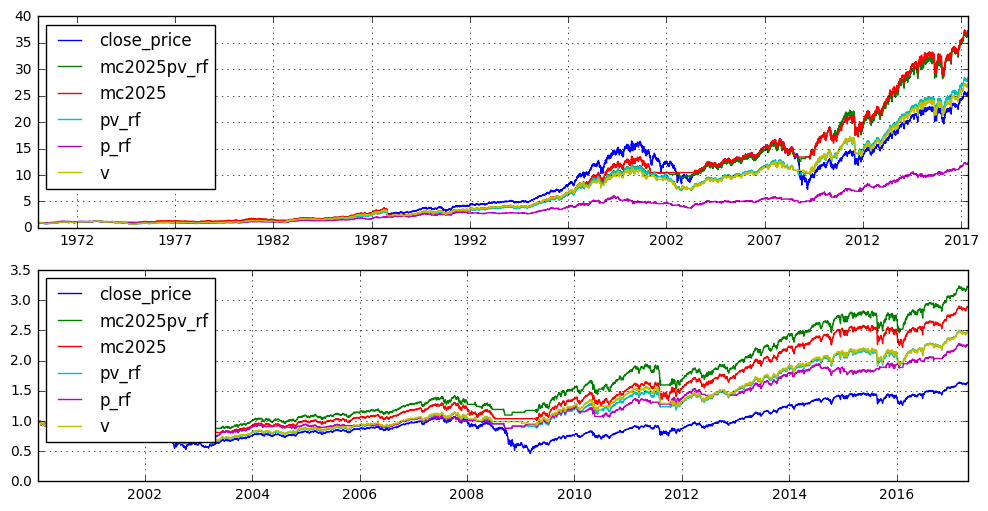

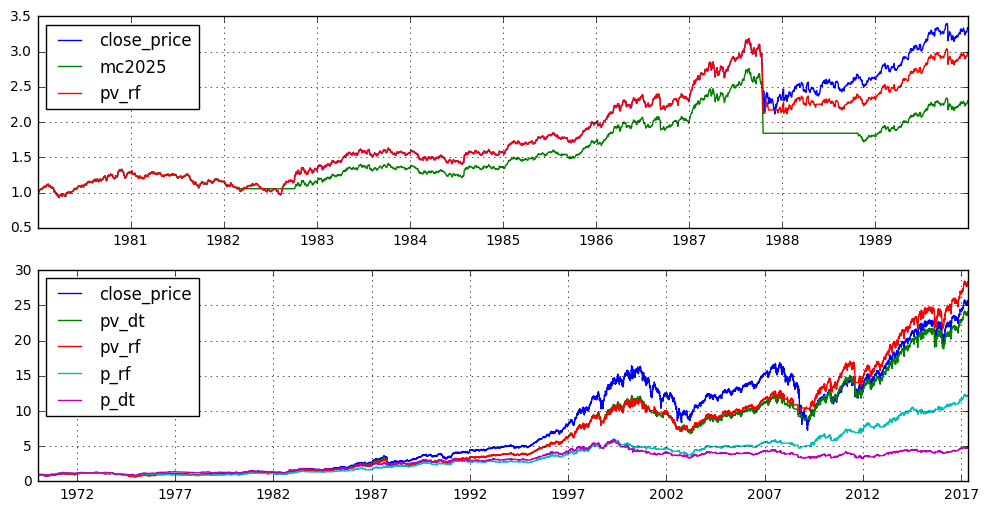

In [32]:
# Graph Summaries
%run algosciquant
g_startyear='1970' # 1970, 1980, 1990, 2000
s = dt.datetime(1970,1,1)
e = dt.datetime(2017,4,28)
s=dt.datetime(int(g_startyear),1,1)
#e =dt.datetime(1989,12,31)


# Graph Results

# Plot 1
files1=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_mc2025pv_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_mc2025_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_RF.csv',  
 './data_jupyter_notebook/dft_sp_nd43_v_'+g_startyear+'_2017428_DT.csv'
]

lnames1=['close_price','mc2025pv_rf','mc2025' ,'pv_rf','p_rf','v']
price_variable='close_price'
fig1 = plt.figure()
dftnf_plot(fig1,s,e,files1,price_variable,lnames1,nsubplot=211) 

# plot 2
s=dt.datetime(2000,1,1)
e=dt.datetime(2017,4,28)
dftnf_plot(fig1,s,e,files1,price_variable,lnames1,nsubplot=212) 

# plot 3
s=dt.datetime(1980,1,1)
e=dt.datetime(1989,12,31)
fig2 = plt.figure()
files3=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_mc2025_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv' 
]
lnames3=['close_price','mc2025','pv_rf']
dftnf_plot(fig2,s,e,files3,price_variable,lnames3,nsubplot=211) 


# plot 4
s = dt.datetime(1970,1,1)
e = dt.datetime(2017,4,28)
files4=[
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_DT.csv',
 './data_jupyter_notebook/dft_sp_nd43_pv_'+g_startyear+'_2017428_RF.csv',  
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_RF.csv',
 './data_jupyter_notebook/dft_sp_nd43_p_'+g_startyear+'_2017428_DT.csv'
]

lnames4=['close_price','pv_dt','pv_rf','p_rf','p_dt']
dftnf_plot(fig2,s,e,files4,price_variable,lnames4,nsubplot=212) 




## References

- Find stocks, [Kiplinger 8 Stocks](http://www.kiplinger.com/slideshow/investing/T052-S003-8-stocks-to-buy-now-for-2017/index.html)

- Kiplingers, "10 Great Stocks for the Next 10 Years", December 2016,   PNRA, ADBE, DHR, FBHS, IDXX, LGF

- Kiplingers, "8 Stocks to buy for now", Jan 2017, GOOG, CMD, AAPL, MEDP

- Kiplingers, "My Top Stock Picks for 2017," Jan 2017, AMZN, CVU, SBUX, CRM

- Other stocks, BRK.B, ^GSPC, KO

- Stanford ML CS229 Trend Stock Prediction,  [Stanford CS229 ML Stock Prediction](http://cs229.stanford.edu/proj2013/DaiZhang-MachineLearningInStockPriceTrendForecsting.pdf) ... **ML Features** PE ratio, PX volume, PX ebitda, current enterprise value, 2-day net price change, 10-day volatility, 50-day moving average, 10-day moving average, quick ratio, alpha overridable, alpha for beta pm, beta raw overridable, risk premium, IS EPS, and corresponding S&P 500 index
- CS229 Stock Prediction Feature Selection, ...  http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf  ... 

- Stanford ML CS229 Text/Article Stock Prediction, [CS229 Bryce Taylor](http://cs229.stanford.edu/proj2013/Taylor-Applying%20Machine%20Learning%20to%20Stock%20Market%20Trading.pdf)
    
- Stock correlations, [Asset Correlations](https://www.portfoliovisualizer.com/asset-correlations)
    
- Example noteboek, [Python Clustering](http://brandonrose.org/clustering)

- Where to get financial data, Quroa - Intrinio, <https://www.quora.com/What-are-some-cheaper-alternatives-to-Bloomberg-data-terminal>

- Intrino, <https://intrinio.com> ... <http://blog.intrinio.com/intrinio-financial-data-in-r-and-rstudio/>  ... API  <http://blog.intrinio.com/stock-api-developers/> ...  <http://docs.intrinio.com>  ... Python Github https://github.com/nhedlund/intrinio .... http://docs.intrinio.com/tags/intrinio-public#data-point .... Converasation with Andrew Carpenter, Intrinio.com ... What I used R for, which I bet you can do better in Python, is to pull in historical prices and then a vector of historical explainatory variables on the same time period. I automated it, and filled forward the quarterly data to match the daily data. Which is the standard in the industry, I learn from my professors. So that gives you a nice clean data frame with as many explainatory variables as you want- valuation metrics, earnings, economic indicators like SPY and VIX. acarpenter@intrinio.com 727-331-3416. ... from the API page  <http://blog.intrinio.com/stock-api-developers/>  good info plus make sure to watch the video. Entire price history using "price" endpoint "https://inntrinio.com/prices?ticker=AAPL" includes 13 data points open, close, adj_high, ... volume  ... use datapoint function to pull in specific data points "https://inntrinio.com/datapoint?ticker=AAPL&item=close_price" ... use the "historical_data" endpoint to pull in time-series "https://inntrinio.com/historical_data?ticker=AAPL&item=pricetoearnings&start_date=2014-01-01&end_date_2015-01-01" ... you can also add in a frequency as "&frequency=yearly"   (yearly, quarterly, monthly, weekly, daily) ... or just the start_date ... **Historical Data Features**  <http://docs.intrinio.com/tags/intrinio-public#historical-data> ... **Modeling financial data in R** ... http://blog.intrinio.com/modeling-financial-data-in-r-with-intrinio/